# Метод Адамса (явный)

### Задача:

#### Дано уравнение $ y'=f(x, y) $, где $ x $ - число, $ y $ - вектор, на отрезке $ x \in [0, 1] $ с начальными условиями $ y(0) = y_0 $. Реализовать явный $ s $ - стадийный метод Адамса вида $ y_{n+1} = a_0*f_n + a_1*f_{n-1} + ... $. Найти решение задачи $ y' = (0, 0, ..., 1) $, $ y_0 = (0, 0, ..., 0) $ размерности $ N $. Шаг интегрирования - $ h $. Функция $ f $ заданна в Python.

### Подключение библиотек:

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from fractions import Fraction
from IPython.display import display, Latex

### Реализация кода:

#### Функция, просчитывающая коэффициенты:

In [38]:
def Adams_coef(s):
    a = [[0] * s for i in range(s)]
    a[0][s-1] = 1
    b = np.ones(s)
    for i in range(s):
        for k in range(s - 1):
            a[i][k] = (i + 1) * (1 - s + k)**i
    answer = np.linalg.solve(a, b)
        
    return answer[::-1]

#### Метод Адамса:

In [44]:
def Adams(f, y_0, x, s):

### Step 0: Объявление значений
    
    y = np.zeros([len(x), len(y_0)])
    # y[0] = y_0
    factors = Adams_coef(s)

### Step 1: Эйлер

    h = x[1] - x[0]
    y[1] = y[0] + h*f(x[0], y[0]) ### Вот тут подправить
    
### Steps 2 to N-1: Адамс-Башфорт

    for i, x_i in enumerate(x[(s-1):-1], start = 1):
        h = x[i + 1] - x_i
        y[i + 1] = y[i] + factors[0] * h * f(x_i, y[i])
        for k in range(1, s):
            y[i + 1] += factors[k] * h * f(x[i - k], y[i - k])

    return y

### Пример:

#### Ввод функции $ f $ и начальных параметров:

In [40]:
x_initial = [0, 1]
y_0 = np.array([0., 0., 0.])

def f(x, y):
    return np.array([0., 0., 1.])

In [41]:
x_initial = [0, 1]
y_0 = np.array([1.])

def f(x, y):
    return y

#### Инициализация $ s $:

In [45]:
print("Введите 'глубину' метода:", end = ' ')
s = int(input())
print()

answer = Adams_coef(s)
print("Получившиеся коэффициенты ", s, "-стадийного метода Адамса:")
c = f"$y_{{i+1}} = y_{{i}} + h[$"
a = Fraction(answer[0]).limit_denominator(10**s)
c += f"$\\frac{{{a.numerator}}}{{{a.denominator}}}$"
c += "f(" + f"$x_{{i}}, y_{{i}}$" + ")"
for i in range(1, s):
    a = Fraction(answer[i]).limit_denominator(10**s)
    if (i % 2 == 0):
        c += f"$+$"
    else:
        c += f"$-$"
    c += f"$\\frac{{{abs(a.numerator)}}}{{{a.denominator}}}$"
    c += "f(" + f"$x_{{i-{i}}}, y_{{i-{i}}}$" + ")"
c += "]"

display(Latex(c))

Введите 'глубину' метода: 3

Получившиеся коэффициенты  3 -стадийного метода Адамса:


<IPython.core.display.Latex object>

### Метод Адамса:

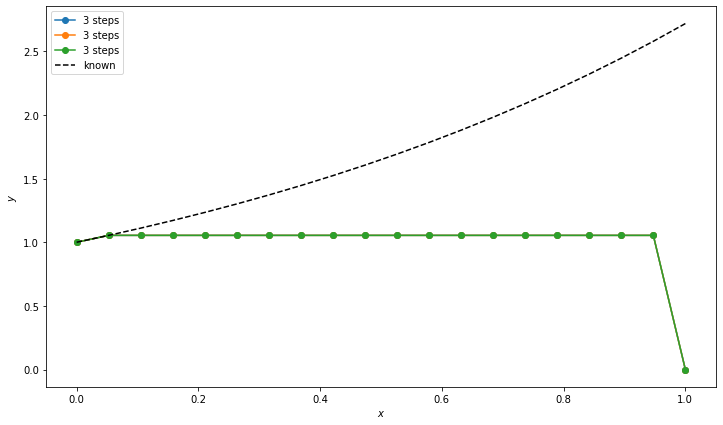

In [46]:
num_steps = 20
x = np.linspace(x_initial[0], x_initial[1], num_steps)

plt.figure(figsize = (12, 7))

y = Adams(f, y_0, x, s)
_ = plt.plot(x, y, '-o', label = str(s) + " steps")

y_known = np.exp(x)
plt.plot(x, y_known, 'k--', label='known')
plt.xlabel('$x$'), plt.ylabel('$y$')

_ = plt.legend(loc = 2)